 1. Select/downloaddataset fromUCI/Kaggleoranyother repository.Performdatacleaningandexploratory
 dataanalysis(EDA)togaininsightsfromdata
 Datacleaningcanbefollowingbutnotlimitedto:
 1. Handlemissingvalues
 2. Detectandtreatoutliers
 3. Convertcategoricaldatatonumerical
 4. Plotdistributions
 5. Analyzedatausingcorrelation
 6. Featureselection

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [21]:
df = pd.read_csv(r"C:\Users\Shailesh\OneDrive\Desktop\coding\Python\Machine Learning\M_0_Assignment\fashion_boutique_dataset.csv")
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [22]:
df.shape

(2176, 14)

In [23]:
df.isnull().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [24]:
df.isnull().mean()*100

product_id              0.000000
category                0.000000
brand                   0.000000
season                  0.000000
size                   22.564338
color                   0.000000
original_price          0.000000
markdown_percentage     0.000000
current_price           0.000000
purchase_date           0.000000
stock_quantity          0.000000
customer_rating        16.636029
is_returned             0.000000
return_reason          85.294118
dtype: float64

In [25]:
df.drop(columns=["return_reason","product_id"],inplace=True)

In [26]:
si = SimpleImputer(strategy="most_frequent")
df[["size"]] = si.fit_transform(df[["size"]])

In [27]:
si_mean = SimpleImputer(strategy="mean")
df[["customer_rating"]] = si.fit_transform(df[["customer_rating"]])

In [28]:
df.isnull().sum()

category               0
brand                  0
season                 0
size                   0
color                  0
original_price         0
markdown_percentage    0
current_price          0
purchase_date          0
stock_quantity         0
customer_rating        0
is_returned            0
dtype: int64

In [29]:
df.duplicated().sum()

0

Detect And Treat Outlier

<Axes: ylabel='original_price'>

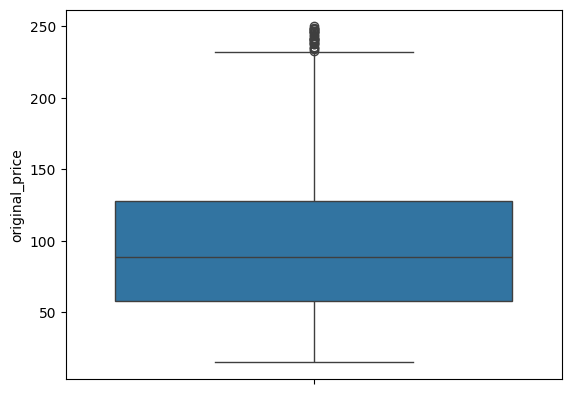

In [30]:
import seaborn as sns

sns.boxplot(df["original_price"])

<Axes: ylabel='original_price'>

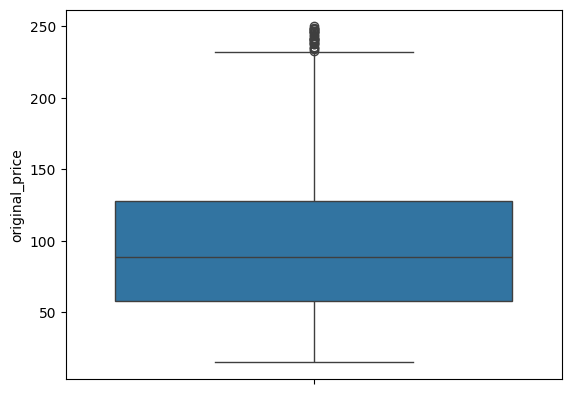

In [31]:
sns.boxplot(df["original_price"])

In [32]:
df["category"].unique()

array(['Outerwear', 'Tops', 'Accessories', 'Shoes', 'Bottoms', 'Dresses'],
      dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
oe = OneHotEncoder(drop='first', sparse_output =False, dtype=int)

# Fit and transform the 'category' column
category_encoded = oe.fit_transform(df[["category"]])

# Convert to DataFrame with appropriate column names
category_encoded_df = pd.DataFrame(category_encoded, columns=oe.get_feature_names_out(["category"]))

# Concatenate encoded columns with original DataFrame
df = pd.concat([df.drop("category", axis=1), category_encoded_df], axis=1)


In [34]:
df.head()

,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,category_Bottoms,category_Dresses,category_Outerwear,category_Shoes,category_Tops
0,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,0,0,1,0,0
1,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,0,0,0,0,1
2,Uniqlo,Winter,XS,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,0,0,0,0,0
3,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,0,0,0,1,0
4,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,2.5,False,0,0,0,0,1
